# Air Pollution

### Importing packages and libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import datetime as dt
from sklearn import datasets, linear_model, metrics
%matplotlib inline

# Importing dataset and  visualizing it

In [2]:
dataset1=pd.read_csv('city_day.csv')

In [3]:
dataset1.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02-01-2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03-01-2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04-01-2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05-01-2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,06-01-2015,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,07-01-2015,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,08-01-2015,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,09-01-2015,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,10-01-2015,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [4]:
dataset2=pd.read_csv('city_hour.csv',)
dataset2.head(10)


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01-01-2015 01:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,01-01-2015 02:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,01-01-2015 03:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,01-01-2015 04:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,01-01-2015 05:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
5,Ahmedabad,01-01-2015 06:00,NaN,NaN,0.33,15.95,10.82,NaN,0.33,29.87,64.25,0.0,0.0,0.0,NaN,NaN
6,Ahmedabad,01-01-2015 07:00,NaN,NaN,0.45,15.94,12.47,NaN,0.45,27.41,191.96,0.0,0.0,0.0,NaN,NaN
7,Ahmedabad,01-01-2015 08:00,NaN,NaN,1.03,16.66,16.48,NaN,1.03,20.92,177.21,0.0,0.0,0.0,NaN,NaN
8,Ahmedabad,01-01-2015 09:00,NaN,NaN,1.47,16.25,18.02,NaN,1.47,16.45,122.08,0.0,0.0,0.0,NaN,NaN
9,Ahmedabad,01-01-2015 10:00,NaN,NaN,2.05,13.78,16.08,NaN,2.05,15.14,NaN,0.0,0.0,0.0,NaN,NaN


In [5]:
dataset3=pd.read_csv('station_day.csv')
dataset3.head(10)


,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,24-11-2017,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,25-11-2017,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,26-11-2017,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,27-11-2017,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,28-11-2017,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
5,AP001,29-11-2017,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate
6,AP001,30-11-2017,69.80,114.86,4.69,20.17,14.54,10.95,0.12,14.07,118.09,0.16,3.52,0.06,165.0,Moderate
7,AP001,01-12-2017,73.96,113.56,4.58,19.29,13.97,10.95,0.10,13.90,123.80,0.17,2.85,0.04,191.0,Moderate
8,AP001,02-12-2017,89.90,140.20,7.71,26.19,19.87,13.12,0.10,19.37,128.73,0.25,2.79,0.07,191.0,Moderate
9,AP001,03-12-2017,87.14,130.52,0.97,21.31,12.12,14.36,0.15,11.41,114.80,0.23,3.82,0.04,227.0,Poor


In [6]:
dataset4=pd.read_csv('station_hour.csv',low_memory=False)

In [7]:
dataset4.head(10)

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,24-11-2017 17:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.10,6.10,0.10,NaN,NaN
1,AP001,24-11-2017 18:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.10,6.25,0.15,NaN,NaN
2,AP001,24-11-2017 19:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.20,5.98,0.18,NaN,NaN
3,AP001,24-11-2017 20:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.20,6.72,0.10,NaN,NaN
4,AP001,24-11-2017 21:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.20,5.75,0.08,NaN,NaN
5,AP001,24-11-2017 22:00,69.25,108.25,0.70,18.47,10.38,13.80,0.1,9.25,91.10,0.20,5.02,0.00,NaN,NaN
6,AP001,24-11-2017 23:00,67.50,111.50,1.05,12.15,7.30,17.65,0.1,9.40,112.70,0.20,5.60,0.10,NaN,NaN
7,AP001,25-11-2017 00:00,68.00,111.00,1.25,14.12,8.50,20.28,0.1,8.90,116.12,0.20,5.55,0.05,NaN,NaN
8,AP001,25-11-2017 01:00,73.00,102.00,0.30,14.30,7.90,11.50,0.3,11.80,121.50,0.20,6.60,0.00,NaN,NaN
9,AP001,25-11-2017 02:00,81.00,123.00,0.80,24.85,13.88,10.28,0.1,11.62,83.80,0.23,6.77,0.10,NaN,NaN


In [8]:
dataset5=pd.read_csv('stations.csv')
dataset5.head(10)

,StationId,StationName,City,State,Status
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active
1,AP002,"Anand Kala Kshetram, Rajamahendravaram - APPCB",Rajamahendravaram,Andhra Pradesh,NaN
2,AP003,"Tirumala, Tirupati - APPCB",Tirupati,Andhra Pradesh,NaN
3,AP004,"PWD Grounds, Vijayawada - APPCB",Vijayawada,Andhra Pradesh,NaN
4,AP005,"GVM Corporation, Visakhapatnam - APPCB",Visakhapatnam,Andhra Pradesh,Active
5,AS001,"Railway Colony, Guwahati - APCB",Guwahati,Assam,Active
6,BR001,"Collectorate, Gaya - BSPCB",Gaya,Bihar,NaN
7,BR002,"SFTI Kusdihra, Gaya - BSPCB",Gaya,Bihar,NaN
8,BR003,"Industrial Area, Hajipur - BSPCB",Hajipur,Bihar,NaN
9,BR004,"Muzaffarpur Collectorate, Muzaffarpur - BSPCB",Muzaffarpur,Bihar,NaN


In [9]:
dataset1.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [10]:
dataset2.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


In [11]:
dataset3.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,86410.000000,65329.000000,90929.000000,91488.000000,92535.000000,59930.000000,95037.000000,82831.000000,82467.000000,76580.000000,69333.000000,22898.000000,87025.000000
mean,80.272571,157.968427,23.123424,35.240760,41.195055,28.732875,1.605749,12.257634,38.134836,3.358029,15.345394,2.423446,179.749290
std,76.526403,123.418672,34.491019,29.510827,45.145976,24.897797,4.369578,12.984723,39.128004,11.156234,29.348587,6.472409,131.324339
min,0.020000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,31.880000,70.150000,4.840000,15.090000,13.970000,11.900000,0.530000,5.040000,18.895000,0.160000,0.690000,0.000000,86.000000
50%,55.950000,122.090000,10.290000,27.210000,26.660000,23.590000,0.910000,8.950000,30.840000,1.210000,4.330000,0.400000,132.000000
75%,99.920000,208.670000,24.980000,46.930000,50.500000,38.137500,1.450000,14.920000,47.140000,3.610000,17.510000,2.110000,254.000000
max,1000.000000,1000.000000,470.000000,448.050000,467.630000,418.900000,175.810000,195.650000,963.000000,455.030000,454.850000,170.370000,2049.000000


In [12]:
dataset4.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,800186.000000,705840.000000,817926.000000,831443.000000,855903.000000,581798.000000,827526.000000,664348.000000,798087.000000,701860.000000,672187.000000,213458.000000,809031.000000
mean,105.015741,201.519810,32.150033,43.681179,52.392202,35.916707,1.393665,14.909659,43.310098,3.276346,20.037383,2.232788,226.952556
std,101.428842,156.384263,60.175818,39.407520,68.461085,27.004348,2.116561,13.355023,61.671795,6.238160,37.993362,7.598436,133.207479
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,16.000000
25%,39.500000,89.820000,3.670000,18.150000,13.900000,19.270000,0.540000,6.620000,10.980000,0.240000,0.920000,0.000000,114.000000
50%,72.000000,159.120000,9.820000,31.890000,29.150000,30.730000,0.950000,11.600000,25.030000,1.550000,6.750000,0.230000,198.000000
75%,135.500000,268.360000,29.960000,56.550000,60.030000,45.980000,1.600000,18.780000,53.670000,4.150000,23.500000,1.630000,320.000000
max,1000.000000,1000.000000,500.000000,499.970000,500.000000,494.110000,50.000000,199.770000,997.000000,491.510000,499.800000,476.310000,1113.000000


In [13]:
dataset5.describe()

,StationId,StationName,City,State,Status
count,230,230,230,230,133
unique,230,230,127,21,2
top,AP001,"Secretariat, Amaravati - APPCB",Delhi,Delhi,Active
freq,1,1,38,38,131


In [14]:
STATIONS = ["KL007", "KL008"]

### Finding the NULL values in the data set and removing it

In [15]:
dataset1.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [16]:
dataset1.isnull().sum().sum()

88488

In [17]:
dataset2.isnull().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
Benzene       163646
Toluene       220607
Xylene        455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [18]:
dataset2.isnull().sum().sum()

2515685

In [19]:
dataset3.isnull().sum()

StationId         0
Date              0
PM2.5         21625
PM10          42706
NO            17106
NO2           16547
NOx           15500
NH3           48105
CO            12998
SO2           25204
O3            25568
Benzene       31455
Toluene       38702
Xylene        85137
AQI           21010
AQI_Bucket    21010
dtype: int64

In [20]:
dataset3.isnull().sum().sum()

422673

In [22]:
dataset4.isnull().sum()

StationId          0
Datetime           0
PM2.5         248389
PM10          342735
NO            230649
NO2           217132
NOx           192672
NH3           466777
CO            221049
SO2           384227
O3            250488
Benzene       346715
Toluene       376388
Xylene        835117
AQI           239544
AQI_Bucket    239544
dtype: int64

In [23]:
dataset4.isnull().sum().sum()

4591426

In [24]:
dataset5.isnull().sum()

StationId       0
StationName     0
City            0
State           0
Status         97
dtype: int64

In [25]:
dataset5.isnull().sum().sum()

97

In [26]:
city_wise_AQI = dataset1[['City','AQI']].groupby(['City']).median().sort_values(['AQI']).reset_index()
city_wise_AQI.head()

,City,AQI
0,Aizawl,23.0
1,Shillong,48.0
2,Thiruvananthapuram,68.0
3,Coimbatore,75.0
4,Amaravati,78.0


In [27]:
city_wise_AQI.tail()

,City,AQI
21,Lucknow,198.0
22,Gurugram,208.0
23,Patna,215.0
24,Delhi,257.0
25,Ahmedabad,384.5


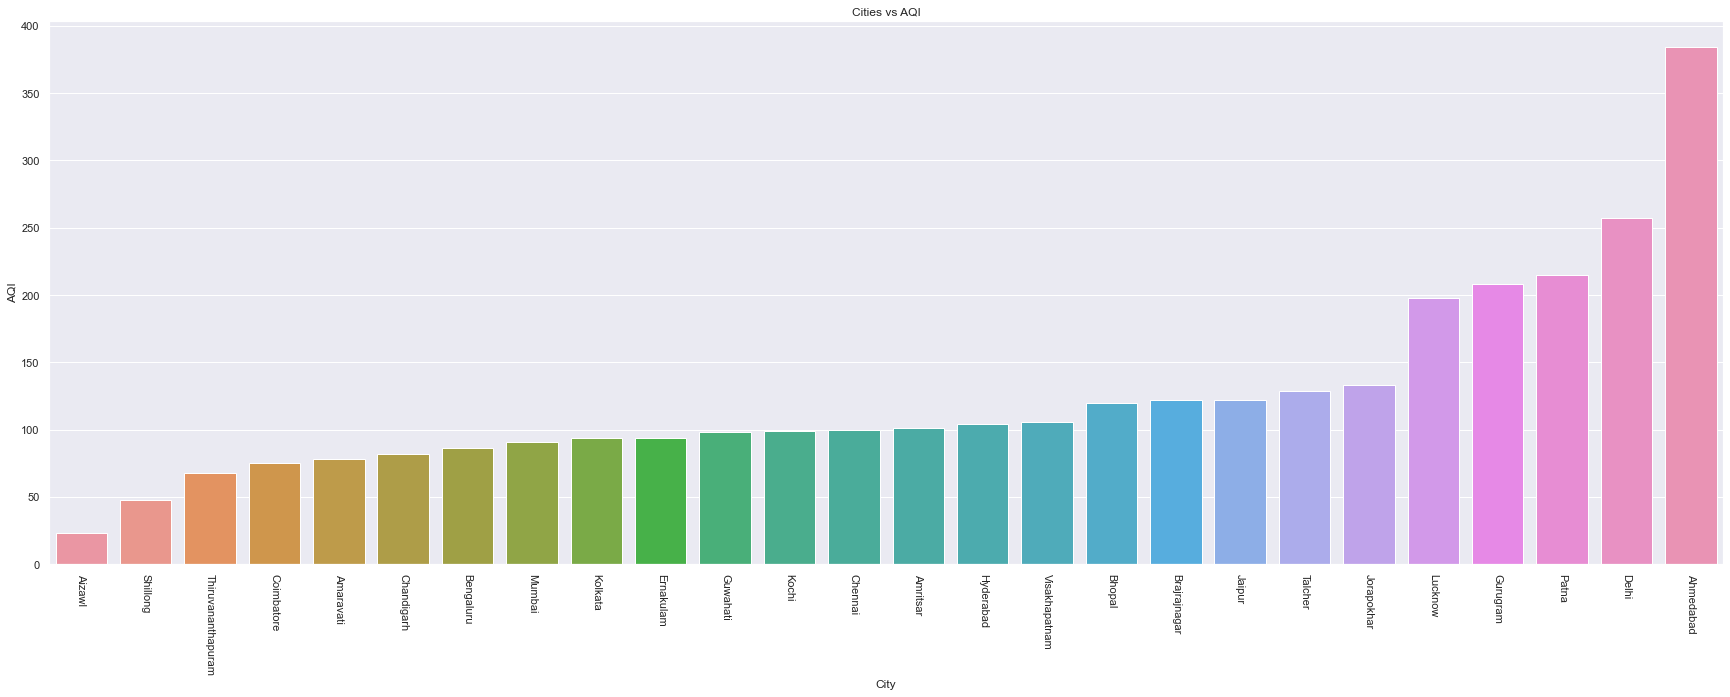

In [28]:
plt.figure(figsize=(30,10))
sns.set(font_scale=1.0)
sns.barplot(x='City', y='AQI', data=city_wise_AQI).set(title ='Cities vs AQI')
plt.xticks(rotation=270)
plt.show()

In [30]:
dataset1['Date'] = pd.to_datetime(dataset1['Date'])
dataset1['year'] = dataset1['Date'].dt.year
dataset1['month'] =dataset1['Date'].dt.month
dataset1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1
1,Ahmedabad,2015-02-01,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,2
2,Ahmedabad,2015-03-01,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,3
3,Ahmedabad,2015-04-01,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,4
4,Ahmedabad,2015-05-01,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,5


In [31]:
yearly_AQI = dataset1[
    ['City','AQI','year']
].groupby(['City','year']).median().sort_values(['AQI']).reset_index()
yearly_AQI.head()

,City,year,AQI
0,Aizawl,2020,23.0
1,Shillong,2019,41.0
2,Amaravati,2020,54.0
3,Shillong,2020,55.0
4,Thiruvananthapuram,2017,62.0


In [34]:
dataset1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,2015,1
1,Ahmedabad,2015-02-01,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,2015,2
2,Ahmedabad,2015-03-01,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,2015,3
3,Ahmedabad,2015-04-01,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,2015,4
4,Ahmedabad,2015-05-01,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,2015,5


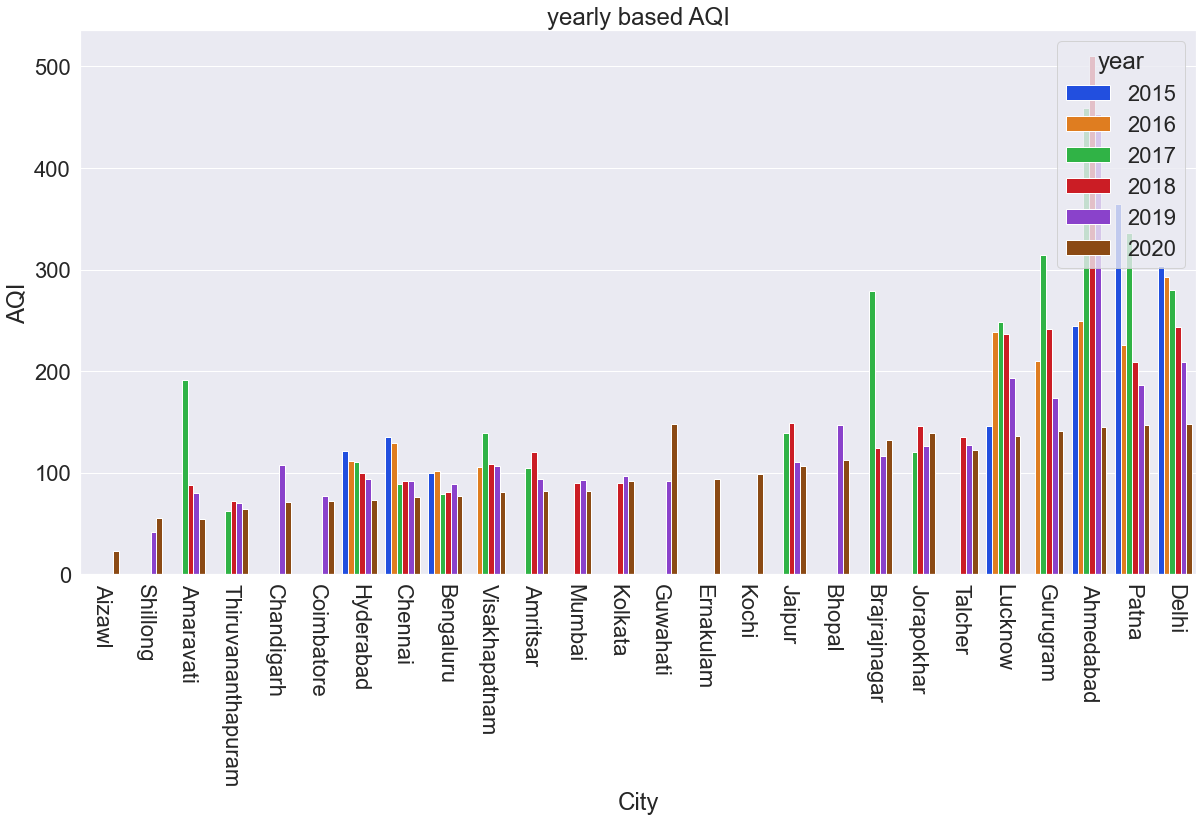

In [35]:
#Plotting
plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.barplot(x='City', y='AQI', data=yearly_AQI,hue='year',palette='bright').set(title ='yearly based AQI')
plt.xticks(rotation=270)
plt.show()

In [36]:
#clubbing datas by months wise
monthlywise = dataset1.groupby(['City','month']).agg(AQI = pd.NamedAgg(column = 'AQI',aggfunc = np.mean))
monthlywise.reset_index(inplace = True)
monthlywise.head()

,City,month,AQI
0,Ahmedabad,1,546.420000
1,Ahmedabad,2,595.409524
2,Ahmedabad,3,509.925000
3,Ahmedabad,4,394.729730
4,Ahmedabad,5,334.157895


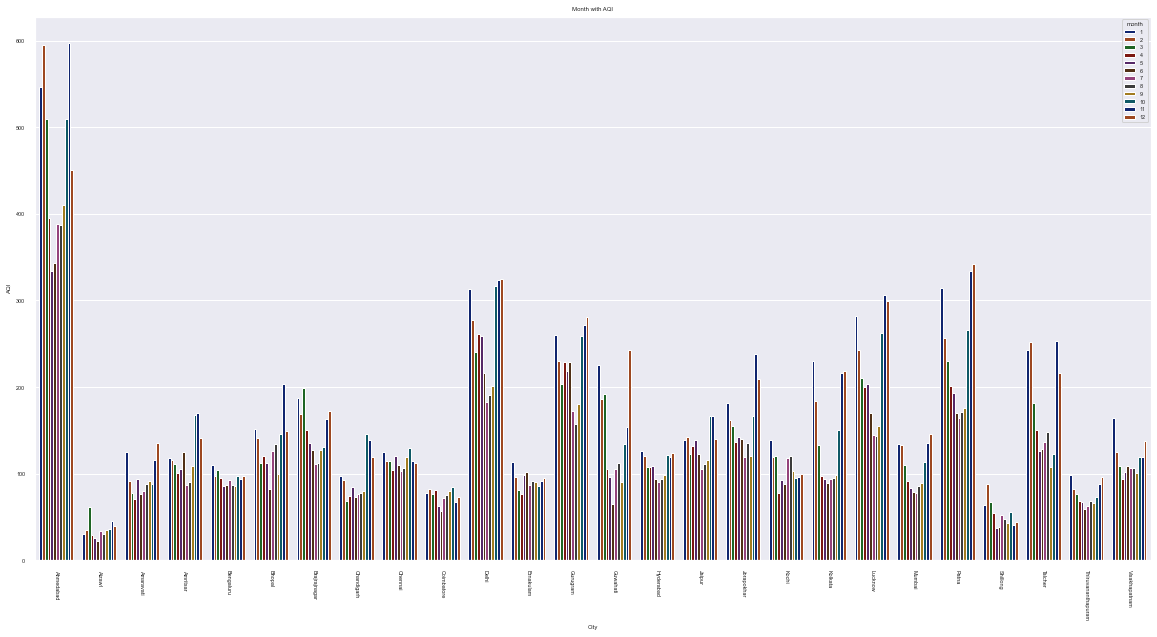

In [37]:
#plotting monthly
plt.figure(figsize=(20,10))
sns.set(font_scale=0.5)
sns.barplot(x='City', y='AQI', data=monthlywise,hue='month',palette = 'dark').set(title ='Month with AQI')
plt.xticks(rotation=270)
plt.show()

In [39]:
dataset6 = pd.read_csv('India_cities_geo_data.csv')
dataset6.head()

,city,latitude,longitude,country
0,Abohar,30.1204,74.2900,India
1,Addanki,15.8110,79.9738,India
2,Adilabad,19.6667,78.5333,India
3,adoni,15.6300,77.2800,India
4,Agartala,23.8333,91.2667,India


In [40]:
dataset1.isnull().sum().sum()

88488

## Calculating AQI

In [41]:
dataset4.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,24-11-2017 17:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,24-11-2017 18:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,24-11-2017 19:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,24-11-2017 20:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,24-11-2017 21:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [42]:
dataset4.head()

,StationId,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,24-11-2017 17:00,60.50,98.00,2.35,30.80,18.25,8.50,0.1,11.85,126.40,0.1,6.10,0.10,NaN,NaN
1,AP001,24-11-2017 18:00,65.50,111.25,2.70,24.20,15.07,9.77,0.1,13.17,117.12,0.1,6.25,0.15,NaN,NaN
2,AP001,24-11-2017 19:00,80.00,132.00,2.10,25.18,15.15,12.02,0.1,12.08,98.98,0.2,5.98,0.18,NaN,NaN
3,AP001,24-11-2017 20:00,81.50,133.25,1.95,16.25,10.23,11.58,0.1,10.47,112.20,0.2,6.72,0.10,NaN,NaN
4,AP001,24-11-2017 21:00,75.25,116.00,1.43,17.48,10.43,12.03,0.1,9.12,106.35,0.2,5.75,0.08,NaN,NaN


In [43]:
PATH_STATION_HOUR = "station_hour.csv"
PATH_STATION_DAY = "station_day.csv"
PATH_CITY_HOUR = "city_hour.csv"
PATH_CITY_DAY = "city_day.csv"
PATH_STATIONS ="stations.csv"
STATIONS = ["KL007", "KL008"]

In [ ]:
df = pd.read_csv(PATH_STATION_HOUR)
stations = pd.read_csv(PATH_STATIONS)

df = df.merge(stations, on = "StationId")

df = df[df.StationId.isin(STATIONS)]
df.sort_values(["StationId", "Datetime"], inplace = True)
df["Date"] = df.Datetime.dt.date.astype(str)
df.Datetime = df.Datetime.astype(str)

In [45]:
## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_SubIndex"] = df["PM2.5_24hr_avg"].apply(lambda x: get_PM25_subindex(x))

KeyError: 'PM2.5_24hr_avg'

In [ ]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

df["PM10_SubIndex"] = df["PM10_24hr_avg"].apply(lambda x: get_PM10_subindex(x))

In [ ]:
## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_SubIndex"] = df["SO2_24hr_avg"].apply(lambda x: get_SO2_subindex(x))

In [ ]:
## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0
df["NOx_SubIndex"] = df["NOx_24hr_avg"].apply(lambda x: get_NOx_subindex(x))

In [ ]:
## NH3 Sub-Index calculation
def get_NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

df["NH3_SubIndex"] = df["NH3_24hr_avg"].apply(lambda x: get_NH3_subindex(x))

In [ ]:
## CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_SubIndex"] = df["CO_8hr_max"].apply(lambda x: get_CO_subindex(x))

In [ ]:
## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_SubIndex"] = df["O3_8hr_max"].apply(lambda x: get_O3_subindex(x))

In [ ]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

df["Checks"] = (df["PM2.5_SubIndex"] > 0).astype(int) + \
                (df["PM10_SubIndex"] > 0).astype(int) + \
                (df["SO2_SubIndex"] > 0).astype(int) + \
                (df["NOx_SubIndex"] > 0).astype(int) + \
                (df["NH3_SubIndex"] > 0).astype(int) + \
                (df["CO_SubIndex"] > 0).astype(int) + \
                (df["O3_SubIndex"] > 0).astype(int)

df["AQI_calculated"] = round(df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                 "NH3_SubIndex", "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
df.loc[df["PM2.5_SubIndex"] + df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
df.loc[df.Checks < 3, "AQI_calculated"] = np.NaN
df["AQI_bucket_calculated"] = df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
df[~df.AQI_calculated.isna()].head()

# Time Series analysis


In [ ]:
dataset1.head()

In [ ]:
df2 = pd.read_csv('city_day.csv', ',', usecols=['City', 'Date', 'AQI', 'AQI_Bucket'])
df2.head()

# Random forest Regression

In [ ]:
dataset1.head()


In [ ]:
print(X_train)

In [ ]:
dataset1.isnull().any()
missing_values = ['NONE', 'None', 'none', 'NAN', 'Nan', 'nan', 'NA', 'Na', 'na']
df = pd.read_csv('city_day.csv', na_values = missing_values)
df.isnull().sum()
dataset1.dropna(inplace=True)

In [78]:
dataset2.isnull().any()
missing_values = ['NONE', 'None', 'none', 'NAN', 'Nan', 'nan', 'NA', 'Na', 'na']
df = pd.read_csv('city_day.csv', na_values = missing_values)
df.isnull().sum()
dataset2.dropna(inplace=True)

In [77]:
dataset3.isnull().any()
missing_values = ['NONE', 'None', 'none', 'NAN', 'Nan', 'nan', 'NA', 'Na', 'na']
df = pd.read_csv('city_day.csv', na_values = missing_values)
df.isnull().sum()
dataset3.dropna(inplace=True)

In [76]:
dataset4.isnull().any()
missing_values = ['NONE', 'None', 'none', 'NAN', 'Nan', 'nan', 'NA', 'Na', 'na']
df = pd.read_csv('city_day.csv', na_values = missing_values)
df.isnull().sum()
dataset4.dropna(inplace=True)

In [75]:
dataset5.isnull().any()
missing_values = ['NONE', 'None', 'none', 'NAN', 'Nan', 'nan', 'NA', 'Na', 'na'," "]
df = pd.read_csv('city_day.csv', na_values = missing_values)
df.isnull().sum()
dataset5.dropna(inplace=True)

In [73]:
dataset1.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
year              0
month             0
dtype: int64